# 1. Linear regression

## 1.1 Computing the minimum via the normal equations

#### 1 Complete the function polyfit_inv_normal_eq for computing w&ast;

  $$w^* = (\Phi^{T}\Phi)^{-1}\Phi^{T}y$$




**1) Calculate Phi**

$$\Phi = \begin{bmatrix} 
1 & x_{1} & x_{1}^{2} & x_{1}^{3}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3}\\
\vdots & \vdots & \vdots & \vdots\\
1 & x_{m} & x_{m}^{2} & x_{m}^{3}
\end{bmatrix}$$

In [5]:
import numpy as np
# Define x --> (m, 1)
x = np.matrix(range(2,7)).T

# Define the number of coefficients to calculate (components of w --> w = (w0, w1, ..., wn))
num_coefficients = 4

# Calculate phi
phi = np.power(np.tile(x,num_coefficients),range(num_coefficients))

In [6]:
phi

matrix([[  1,   2,   4,   8],
        [  1,   3,   9,  27],
        [  1,   4,  16,  64],
        [  1,   5,  25, 125],
        [  1,   6,  36, 216]], dtype=int32)

<font color='green'>Phi is the design matrix</font>

**2) Calculate w&ast;**

In [7]:
# Define y --> (m, 1)
y = np.matrix(range(2,7)).T

# Calculate w*
w_ast = np.matmul(np.matmul(np.matmul(phi.T,phi).I,phi.T),y)

In [8]:
w_ast

matrix([[-5.01643171e-12],
        [ 1.00000000e+00],
        [ 1.49213975e-13],
        [-4.44089210e-16]])

<font color='green'>w is the vector which contains the coefficients minimizing the error between y values and the predicted with the coefficients obtained. As we expected, since x and y are the same, the coefficient on x is 1 and the rest almost 0.</font>

**Function definition**

In [9]:
def calculate_phi(x: np.matrix,
                  n: int):
    """
    Calculates phi (data matrix) for a given set of coefficients
    
    :param x: m x 1, points in the x axis where the function is known
    :param n: number of coefficients (degree of the polynomial + 1)
    
    :return phi: m x n, data matrix
    """
    phi = np.tile(x, [1, n])
    phi = np.power(phi, np.ones((len(x), 1)) * list(range(0, n)))
    return phi

def calculate_w_ast(phi: np.matrix,
                    y: np.matrix):
    """
    Calculates w*
    
    :param y: m x 1, known values of the function at positions in x
    :param n: number of coefficients (degree of the polynomial + 1)
    
    :return w: n x 1, vector of polynomial coefficients
    """
    w_ast=np.matmul(np.matmul(np.matmul(phi.T,phi).I,phi.T),y)
    return w_ast

def polyfit_inv_normal_eq(x: np.matrix,
                          y: np.matrix,
                          n: int):
    """
    Fits a polynomial of degree n to a sets of samples x and y.
    The polynomial minimizes the sum of squared errors (least squares)
    solving the normal equations.

    :param x: m x 1, points in the x axis where the function is known
    :param y: m x 1, known values of the function at positions in x
    :param n: number of coefficients (degree of the polynomial + 1)

    :return w: n x 1, vector of polynomial coefficients
    :return phi: m x n, data matrix
    """
    # TODO: create phi
    phi = np.power(np.tile(x,n),range(n))
    
    # TODO: create w*
    w_ast = calculate_w_ast(phi,y)
    
    return phi, w_ast

In [10]:
polyfit_inv_normal_eq(x, y, num_coefficients)
print("Design matrix: \n{}\n\nCoefficients: \n{}".format(phi,w_ast))


Design matrix: 
[[  1   2   4   8]
 [  1   3   9  27]
 [  1   4  16  64]
 [  1   5  25 125]
 [  1   6  36 216]]

Coefficients: 
[[-5.01643171e-12]
 [ 1.00000000e+00]
 [ 1.49213975e-13]
 [-4.44089210e-16]]


<font color='green'>Here we generalize the first example we saw creating some functions, and check that the results don't change.</font>

#### 2. Complete the function polyfit_main, to verify that the w&ast; returned by polyfit_inv_normal_eq satisfies that the residue r = y − &phi;w&ast; is orthogonal to Im&phi;, i.e. r ⊥ Im&phi;. Hint: Im&phi; is the space generated by the columns of &phi;.

**Generate random data**

We will generate an artificial data set. We do it by generating random
samples from the following polynomial:
 
p(x) = w<sub>0</sub> + w<sub>1</sub>\*x + w<sub>2</sub>\*x<sup>2</sup> + w<sub>3</sub>\*x<sup>3</sup> 
 
We generate some x<sub>i</sub>, with their corresponding y<sub>i</sub>, and then add random noise to the y<sub>i</sub> to simulate errors in the measurement. 

In [11]:
# Generate w (random)
w = np.matrix(np.random.uniform(size = (4, 1)))

# Generate x (known data)
size = 100
x = np.matrix(np.random.uniform(size=(size, 1), low = -10, high = 10))

# Generate y
phi = calculate_phi(x = x, n = len(w))
y = np.dot(phi, w) + 2 * np.random.uniform(size = (size, 1))
y = np.matrix(y)

Build up a graphic that shows p(x)

In [12]:
import matplotlib.pyplot as plt

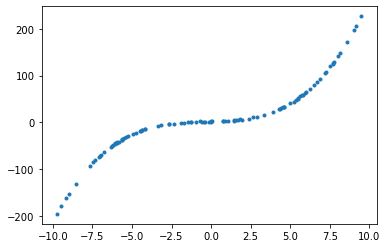

In [13]:
plt.plot(x, y, '.')

**Calculate the residue**

In [14]:
w_ast = calculate_w_ast(phi = phi, y = y)
residue = y - np.dot(phi, w_ast)

**Demostrate r ⊥ Im&phi;**

To demonstrate that r ⊥ Im&phi; we need to check that the scalar product of both matrixes is 0

In [15]:
scalar_product = np.dot(phi.T, residue)
scalar_value = scalar_product.sum()
print("Scalar product matrix: \n\n{}\n".format(scalar_product))
print("Scalar product solution: {}".format(scalar_value))

Scalar product matrix: 

[[ 2.17603713e-13]
 [-3.45775137e-11]
 [-1.25060112e-11]
 [-1.34356797e-09]]

Scalar product solution: -1.3904338890536809e-09


<font color='green'>In some way this reuslts are a bit intuitive: in the case seen, Ax=b, b does not belong to the IM(A) nut we compute the projection which will be in Im(A) and will minimize the error.
    The error is the diference between the real values and this projection, which visually it is very easy to check that they are orthogonal.</font>   

**Function definition**

In [16]:
def polyfit_main(n_data_samples: int = 100,
                 polynomial_size: int = 4,
                 lower_data_value: int = -10,
                 higher_data_value: int = 10):
    """
    Fits a polynomial of degree n to a set of samples.

    :param n_data_samples: number of samples to be created
    :param polynomial_size: polynomial size (number of elements in array)
    :param lower_data_value: lowest value in data
    :param higher_data_value: highest value in data

    :return:
    """
    # TODO: create x
    x = np.matrix(np.random.uniform(lower_data_value,higher_data_value, size=(n_data_samples,1)))

    # TODO: create y to fit p(x) = w0 + w1 * x + w2 * x^2 + w3 * x ^ 3 + ... + wn * x ^ n --> n = polynomial_size
    w = np.matrix(np.random.uniform(size = (polynomial_size, 1)))
    phi = calculate_phi(x = x, n = len(w))
    y = np.dot(phi, w) + 2 * np.random.uniform(size = (n_data_samples, 1))
    y = np.matrix(y)

    # Plot the graphic
    plt.figure()
    plt.plot(x, y, '.')
    plt.show()

    # TODO: Calculate w*
    w_ast = calculate_w_ast(phi = phi, y = y)

    # TODO: Calculate the residue and demostrate it is orthogonal to Phi
    residue = y - np.dot(phi, w_ast)
    scalar_product = np.dot(phi.T, residue)
    scalar_value = scalar_product.sum()
    print("Scalar product matrix: \n\n{}\n".format(scalar_product))
    print("Scalar product solution: {}".format(scalar_value))

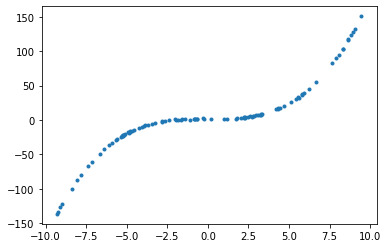

Scalar product matrix: 

[[ 6.61692923e-14]
 [-5.47533538e-13]
 [ 7.62865487e-12]
 [ 2.66684060e-10]]

Scalar product solution: 2.738313503897501e-10


In [17]:
polyfit_main()

<font color='green'>As before, this is the generalization and check of the previous case.</font>

## 1.2 Minimization with the SVD

#### The pseudo-inverse

##### 1) Generate a 5 × 3 random matrix, A. Compute its SVD A = USV<sup>T</sup> using the command svd. Verify that A = USV<sup>T</sup>.

**Generate A**

In [18]:
A = np.matrix(np.random.uniform(size = (5, 3)))
print(A)

[[0.90453339 0.53317783 0.61036661]
 [0.09799557 0.71256561 0.45177284]
 [0.44011474 0.43370318 0.58232648]
 [0.37370855 0.26664625 0.73573758]
 [0.50577683 0.230607   0.59125091]]


**Compute its SVD**

Numpy provides a function to compute the SVD of a given matrix. It is accesible from its *linalg* object, and it will return U, S and V<sup>T</sup>. Moreover, S is not a rectangular diagonal matrix as expected, so in order to perform real operations with it you must use *diag(S)*

In [19]:
U, S, Vt =  np.linalg.svd(A, full_matrices=False)
print("U: \n\n{}\n\nS: \n\n{}\n\nVt: \n\n{}".format(U, S, Vt))

U: 

[[-0.59502267 -0.36789671  0.63496259]
 [-0.35479599  0.88305573  0.14831225]
 [-0.42829457  0.0826825  -0.05967733]
 [-0.41998464 -0.04656158 -0.70545594]
 [-0.40030549 -0.27542731 -0.27128679]]

S: 

[1.97910203 0.53802016 0.34883634]

Vt: 

[[-0.56636906 -0.48512992 -0.66623948]
 [-0.68130297  0.73047357  0.0472718 ]
 [ 0.46373737  0.48068422 -0.74423809]]


**Verify that A = USV<sup>T</sup>**

In [20]:
# Calculate A
A_recovered = np.matmul(np.matmul(U, np.diag(S)), Vt)

# Check if calculated A is equal to, or really close to, the original A
print("Is verified that A = U * S * transpose(V): {}".format(np.allclose(A, A_recovered)))

Is verified that A = U * S * transpose(V): True


**Verify that U and V are orthogonal matrixes**

To verify that we will use the following consideration: If U and V are orthogonal, then (U * V)<sup>-1</sup> = (U * V)<sup>T</sup> 

In [21]:
Q = np.dot(U, Vt.T) 
B = Q.I
C = Q.T

print("Q\n\n{}\n\nB\n\n{}\n\nC\n\n{}\n\nIs U ⊥ V? {}".format(Q, B, C, np.allclose(B, C)))

Q

[[ 0.09244299  0.16666772 -0.92533973]
 [-0.32626277  0.89378342  0.14955917]
 [ 0.24222043  0.34937469 -0.11445788]
 [ 0.73045732  0.21877661  0.30788319]
 [ 0.54108064  0.05871273 -0.11612822]]

B

[[ 0.09244299 -0.32626277  0.24222043  0.73045732  0.54108064]
 [ 0.16666772  0.89378342  0.34937469  0.21877661  0.05871273]
 [-0.92533973  0.14955917 -0.11445788  0.30788319 -0.11612822]]

C

[[ 0.09244299 -0.32626277  0.24222043  0.73045732  0.54108064]
 [ 0.16666772  0.89378342  0.34937469  0.21877661  0.05871273]
 [-0.92533973  0.14955917 -0.11445788  0.30788319 -0.11612822]]

Is U ⊥ V? True


<font color='green'>It is checked that the SVD functions worked well and that U and V are orthogonal</font>

##### 2) Compute the pseudo-inverse of S, S†. Use it to compute the pseudo-inverse of A, A†. Verify that A†A is the identity matrix of size 3. What happens with AA†?

**Compute the pseudo-inverse of S**

In [22]:
S_pinv = np.linalg.pinv(np.diag(S))
print(S_pinv)

[[0.50527966 0.         0.        ]
 [0.         1.85866642 0.        ]
 [0.         0.         2.86667384]]


**Compute the pseudo-inverse of A by using the pseudo-inverse of S**

In [23]:
A_pinv = np.dot(np.dot(Vt.T, S_pinv), U.T)
print(A_pinv)

[[ 1.48026255 -0.81952913 -0.06146906 -0.75867105  0.1026908 ]
 [ 0.52131602  1.49026958  0.13501157 -0.93236121 -0.64964777]
 [-1.18670249 -0.11939735  0.27876546  1.64237315  0.68934507]]


**Verify that A†A is the identity matrix of size 3**

In [24]:
I_ = np.matmul(A_pinv, A)
print("A†A:\n\n{}\n".format(I_))
print("A†A is the identity matrix of size 3?: {}".format(np.allclose(I_, np.identity(n = len(I_)))))

A†A:

[[ 1.00000000e+00 -5.15144202e-16  5.13226005e-16]
 [-5.73429835e-16  1.00000000e+00 -1.82364757e-16]
 [ 3.04612622e-17 -1.77257888e-16  1.00000000e+00]]

A†A is the identity matrix of size 3?: True


<font color='green'>We used the properties seen in class to compute the pseudo-inverse and verified that indeed, this properties work.
AA† should also be equal to I, but due to the option of full_matrices=false we get that U*U.T is not I, which might be some error caused by not using all the columns, because U is an orthogonal matrix.</font>

#### Solving least squares with the pseudo-inverse

#### 5. Complete the function polyfit_svd_normal_eq for computing w\*

$$w^{*} = \Phi^{-1}y = \Phi^{\dagger}y = VS^{\dagger}U^{T}y$$

**1) Calculate Phi**

In [25]:
# Define x --> (m, 1)
x = np.matrix([2, 3, 4, 5, 6]).T

# Define the number of coefficients to calculate (components of w --> w = (w0, w1, ..., wn))
num_coefficients = 4

# Calculate phi
phi = calculate_phi(x = x, n = num_coefficients)
print("Phi: \n\n{}".format(phi))

Phi: 

[[  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]]


**2) Calculate its SVD**

In [26]:
U, S, Vt = np.linalg.svd(phi, full_matrices=False)
print("U: \n\n{}\n\nS: \n\n{}\n\nVt: \n\n{}".format(U, S, Vt))

U: 

[[-0.03283666 -0.37051658  0.78790384 -0.47598428]
 [-0.10723867 -0.54745154  0.20187772  0.64766553]
 [-0.25015066 -0.55862687 -0.31337726  0.11344445]
 [-0.48395713 -0.27912244 -0.4064998  -0.54227544]
 [-0.83104258  0.41598191  0.27387137  0.21687794]]

S: 

[2.63567742e+02 8.38650344e+00 8.42096780e-01 5.39380292e-02]

Vt: 

[[-0.00646978 -0.03336536 -0.17875999 -0.98330553]
 [-0.159749   -0.41943774 -0.87639293  0.1746072 ]
 [ 0.64574036  0.63966645 -0.41402223  0.04931337]
 [-0.74663096  0.64326166 -0.16901447  0.01381148]]


**3) Compute the pseudo-inverse of S**

In [27]:
S_pinv = np.linalg.pinv(np.diag(S))
print("Pseudo-inverse of S: \n\n{}".format(S_pinv))

Pseudo-inverse of S: 

[[3.79409101e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.19239205e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.18751196e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.85397949e+01]]


**4) Calculate w\***

In [28]:
# Define y --> (m, 1)
y = np.matrix([2, 3, 4, 5, 6]).T

# Compute w*
phi_pinv = np.dot(np.dot(Vt.T, S_pinv), U.T)
w_ast = np.dot(phi_pinv, y)
print("W*\n\n{}\n".format(w_ast))
print("Is current w* equal to polyfit_inv_normal_eq output? {}".format(np.allclose(w_ast, polyfit_inv_normal_eq(x, y, num_coefficients)[1])))

W*

[[ 3.19744231e-14]
 [ 1.00000000e+00]
 [ 8.88178420e-15]
 [-3.33066907e-16]]

Is current w* equal to polyfit_inv_normal_eq output? True


**Function definition**

In [29]:
def polyfit_svd_normal_eq(x: np.matrix,
                          y: np.matrix,
                          n: int):
    """
    Fits a polynomial of degree n to a sets of samples x and y. The polynomial minimizes the sum 
    of squared errors (least squares) using the pseudoinverse of data matrix.
    
    :param x: m x 1, points in the x axis where the function is known
    :param y: m x 1, known values of the function at positions in x
    :param n: number of coefficients (degree of the polynomial + 1)
    
    :return w_ast: n x 1, vector of polynomial coefficients
    :return phi_pinv: n x m, pseudo-inverse of Phi
    :return phi: m x n, data matrix
    """
    # Calculate phi
    phi = calculate_phi(x = x, n = n)
    
    # Calculate its SVD
    U, S, Vt = np.linalg.svd(phi, full_matrices=False)
    
    # Calculate the pseudo-inverse of S
    S_pinv = np.linalg.pinv(np.diag(S))
    
    # Calculate w*
    phi_pinv = np.dot(np.dot(Vt.T, S_pinv), U.T)
    w_ast = np.dot(phi_pinv, y)
    
    return w_ast, phi_pinv, phi

In [30]:
polyfit_svd_normal_eq(x, y, num_coefficients)

(matrix([[ 3.19744231e-14],
         [ 1.00000000e+00],
         [ 8.88178420e-15],
         [-3.33066907e-16]]),
 matrix([[ 7.20000000e+00, -8.80000000e+00, -1.80000000e+00,
           7.20000000e+00, -2.80000000e+00],
         [-5.05952381e+00,  7.90476190e+00,  1.14285714e+00,
          -6.76190476e+00,  2.77380952e+00],
         [ 1.14285714e+00, -2.07142857e+00, -1.42857143e-01,
           1.92857143e+00, -8.57142857e-01],
         [-8.33333333e-02,  1.66666667e-01, -2.52519933e-15,
          -1.66666667e-01,  8.33333333e-02]]),
 matrix([[  1.,   2.,   4.,   8.],
         [  1.,   3.,   9.,  27.],
         [  1.,   4.,  16.,  64.],
         [  1.,   5.,  25., 125.],
         [  1.,   6.,  36., 216.]]))

<font color='green'>We applied the general SVD formula for the pseudo-inverse, and check it's correctness. We obtained the same results, but this method has a main advantage: it is generalized for any case, while the first was just the solution for this concrete case. The solution provided by phyton pinv also coincides with the other ones.</font>

# 2. Principal Components Analysis

#### 1. Complete the function pca_prin_dir for computing the p first principal directions via the eigenvectors of X<sup>T</sup>X.


**1) Center X**

In [31]:
# Define x --> (m, 1)
m=5
x = np.matrix(np.linspace([1,3],[5,7],num=m))
print("X: \n\n{}\n".format(x))

# Calculate its mean
mu = np.mean(x, axis = 0)
print("Mean: {}\n".format(mu))
# Center X
x = x - mu
print("X centered: \n\n{}\n".format(x))

X: 

[[1. 3.]
 [2. 4.]
 [3. 5.]
 [4. 6.]
 [5. 7.]]

Mean: [[3. 5.]]

X centered: 

[[-2. -2.]
 [-1. -1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  2.]]



**2) Calculate the empirical covariance matrix**

In [32]:
C = (1 / (len(x) - 1)) * np.matmul(x.T, x)
print("Covariance matrix: \n\n{}".format(C))

Covariance matrix: 

[[2.5 2.5]
 [2.5 2.5]]


**3) Compute p-first principal directions**

In [33]:
# Define the number of p-directions to be retrieved
p = 2

# Compute the principal directions and ort them by lambda values (eigen values) and return only 
# the p-first values
eigen_values, eigen_vectors = np.linalg.eig(C)

idx = eigen_values.argsort()[::-1]   
eigen_values = eigen_values[idx][:p]
eigen_vectors = eigen_vectors[:,idx][:, :p]

In [34]:
print("Eigen values: \n\n{}\n\nEigen vectors: \n\n{}".format(eigen_values, eigen_vectors))

Eigen values: 

[5.0000000e+00 4.4408921e-16]

Eigen vectors: 

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


<font color='green'>This directions correspond to the eigenvevectors of the covariance matrix and point to the maximum varience directions which have more information about the data. The eigenvectors represent the stretching of these vectors.  </font>

**Function definition**

In [35]:
def pca_prin_dir(x: np.matrix,
                 p: int):
    """
    Computes the principal directions, variances and mean of vectors in x. 
    x is a row data matrix: its rows are vectors xi. The principal directions are given 
    by eigenvectors of the empirical covariance matrix, x'*x.
        
    :param x: row data matrix, m x n
    :param p: number of principal directions
    
    :return eigen_vectors: principal direction matrix (each column is a PD) n x p
    :return eigen_values: eigenvalue diagonal matrix p x p
    :return mu: mean
    """
    # TODO: Calculate the mean of the incoming data and center x
    mu = np.mean(x, axis = 0)
    x = x - mu
    
    # TODO: Calculate the empirical covariance matrix
    C = (1 / (len(x) - 1)) * np.matmul(x.T, x)
    
    # TODO: Compute the principal directions and sort them by lambda values (eigen values) and return only 
    # the p-first values
    eigen_values, eigen_vectors = np.linalg.eig(C)

    # Sort them by lambda values (eigen values) and return only the p-first values
    idx = eigen_values.argsort()[::-1]   
    eigen_values = eigen_values[idx][:p]
    eigen_vectors = eigen_vectors[:,idx][:, :p]
    
    return eigen_vectors, eigen_values, mu

In [36]:
m=5
x = np.matrix(np.linspace([1,3],[5,7],num=m))
pca_prin_dir(x, 2)

(matrix([[ 0.70710678, -0.70710678],
         [ 0.70710678,  0.70710678]]),
 array([5.0000000e+00, 4.4408921e-16]),
 matrix([[3., 5.]]))

<font color='green'>Generalization and chack of the previous case</font>

#### 2. Complete the function pca_prin_comp for computing the p first principal components [<x, v<sub>i</sub>>]<sub>i=1, ..., p</sub> of a point x


- Equation to be used: z<sub>p</sub> = V<sub>p</sub><sup>T</sup>x --> z<sub>i</sub> = [<x<sub>i</sub>-mu,v<sub>1</sub>> <x<sub>i</sub>-mu,v<sub>2</sub>> ... <x<sub>i</sub>-mu,v<sub>p</sub>> ]


- Where: x = $\hat{x}$ - &mu;

**1) Center X**

In [37]:
# Define x --> (m, 1)
x = np.matrix([[1, 2, 3, 4], [5, 6, 7, 8]])
print("X: \n\n{}\n".format(x))

# Calculate its mean
mu = np.mean(x, axis = 0)
print("Mean: {}\n".format(mu))

# Center X
x = x - mu
print("X centered: \n\n{}\n".format(x))

X: 

[[1 2 3 4]
 [5 6 7 8]]

Mean: [[3. 4. 5. 6.]]

X centered: 

[[-2. -2. -2. -2.]
 [ 2.  2.  2.  2.]]



**2) Project x over basis elements to compute principal components**

In [38]:
eigen_vectors, eigen_values, _ = pca_prin_dir(x,p)

In [39]:
z= np.matmul(x,eigen_vectors)
z

matrix([[ 4.00000000e+00,  5.55111512e-16],
        [-4.00000000e+00, -5.55111512e-16]])

<font color='green'>Projecting our centered data in the directions of maximum variance gives us the principal components(which contain the most information)</font>

**Function definition**

In [40]:
def pca_prin_comp(x: np.matrix,
                  eigen_vectors: np.matrix,
                  mu: np.matrix = None):
    """
    Computes the principal components of vectors in x. x is a row data matrix: its rows are vectors xi. 
    The principal components zi of a vector xi are given by the projection over the principal directions: 

                            zi = [ <xi-mu,v1> <xi-mu,v2> ... <xi-mu,vp> ]

    :param x: row data matrix, m x n
    :param eigen_vectors: principal direction matrix (each column is a PD) n x p

    :return z : m x p, principal component matrix. Row i contains the princpal components of xi
    """
    # TODO: Calculate the raw data mean along row axis and center x
    if mu is None:
        mu = np.mean(x, axis = 0)
    x = x - mu

    # Project x over basis elements to compute principal components
    z = np.matmul(x, eigen_vectors) 
    
    return mu, z

In [41]:
x = np.matrix([[1, 2, 3, 4], [5, 6, 7, 8]])
mu, z_p = pca_prin_comp(x = x,eigen_vectors = eigen_vectors)

<font color='green'>Again, we converted the step in functions</font>

#### 3. Complete the function pca_reconstruct for reconstructing a point x from its principal components.


- Equation to be used: $\hat{x}$ = z<sub>p</sub>V<sub>p</sub><sup>T</sup>
- Where: x = $\hat{x}$ + &mu;


In [42]:
# Calculate x_hat
x_hat = np.matmul(z_p, eigen_vectors.T)

# Add the mean to recover the real matrix values
x_ = x_hat + mu

**Function definition**

In [43]:
def pca_reconstruct(z: np.matrix([]),
                    eigen_vectors: np.matrix([]),
                    mean: float):
    """
    Given a set of vectors z(i,:) (rows of matrix z) expressed in principal components, this function computes the x(i,:), 'inverting' the PCA change of coordinates. 
    It goes from the low dimensional PCA representation to the high dimensional vectors.

    :param z: m x p, principal component matrix (row-wise). 
    :param V: principal direction matrix (each column is a PD) n x p
    :param mu: mean

    :return x: row data matrix, m x n. Row x(i,:) is the high dimensional reconstruction from z(i,:)
    """
    # Calculate x_hat
    x_hat = np.matmul(z, eigen_vectors.T)

    # Add the mean to recover the real matrix values
    x_ = x_hat + mean
    
    return x_

In [44]:
# z_p is calculated in the step before
pca_reconstruct(z = z_p, eigen_vectors = eigen_vectors, mean = mu)

matrix([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

<font color='green'>This function allows to recover our original values from the projected ones </font>

#### 4. For the flat ellipsoid dataset (provided together with the code) run the following lines. Four figures will open. Read the code and explain what each figure is showing. Answer the questions asked in the code.

In [112]:
# Install a widget that will allow you to build up interactive plots
#!conda install -c conda-forge ipympl -y

# If using JupyterLab
#!conda install -c conda-forge nodejs -y
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-matplotlib

# After run this lines, close the jupyter session and restore it

**1) Read the CSV file which contains the data and plot them**

In [46]:
#pip install mpld3

Note: you may need to restart the kernel to use updated packages.


In [47]:
#pip install ipympl

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: attrs>=17.4.0 in c:\users\usuario\anaconda3\lib\site-packages (from jsonschema!=2.5.0,>=2.4->nbformat>=4.2.0->ipywidgets>=7.6.0->ipympl) (20.3.0)



In [48]:
# Import Pandas --> see https://pandas.pydata.org/ 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpld3
import matplotlib.cm as cm
%matplotlib widget

In [49]:
# Read the file
data = pd.read_csv("../data/point_cloud_r3.csv", sep = ",", header=None, names = ["x", "y", "z"])
data.head()

,x,y,z
0,2.09450,3.2207,0.26258
1,4.11370,4.4256,-0.27051
2,0.48331,1.9079,-3.02970
3,4.57860,8.9463,-8.50280
4,0.29102,1.3979,-0.26870


In [50]:
# Plot the data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', )
ax.scatter(data['x'], data['y'], data['z'], s=10, alpha=0.9, edgecolors='w', depthshade = False)
plt.xticks(list(range(int(data['x'].min()), int(data['x'].max()), 1)))
plt.yticks(list(range(int(data['y'].min()), int(data['y'].max()), 1)))
ax.set_zticks(list(range(int(data['z'].min()), int(data['z'].max()), 1)))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<font color='green'>This figure is just a plot of our data</font>

**2) Compute principal all principal directions and the correspoding eigenvalues**

**NOTE:** in this example we are going to do some visualization of the principal
components in IR^3. For that we will compute ALL principal directions and ALL
principal components. Please note that this is not the typical way in which
PCA is used.  In a normal application of dimensionality reduction we would
compute only a few principal directions and principal components.

In [51]:
# Define the number of principal directions 
p = len(data.columns)

# Calculate the PCA principal directions for the given data
eigen_vectors, eigen_values, mu = pca_prin_dir(data.values, p)
print("Eigen values: \n\n{}\n\nEigen vectors: \n\n{}".format(eigen_values, eigen_vectors))

Eigen values: 

[8.30218308 4.30424699 0.44129079]

Eigen vectors: 

[[ 0.21550452  0.56476037 -0.79662006]
 [ 0.12168039  0.79389972  0.59574921]
 [ 0.96889199 -0.22531968  0.10236872]]


#### Answer the following questions:
**a) What can you tell from the eigenvalues about the geometry of the original point set?**

<font color='green'>Watching the eigenvalues we can say that the geometry should be elliptical, due to the fact that one of the dimensions is almost twice longer another one, and the third one is really close to zero</font>

**b) Which is the number of components you would keep to hold at least the 95% of the variance?**

<font color='green'>In order to answer this question, we must represent the explained variance in terms of participation. Probably it will be 2 since the third component doesn't provide many useful information, but let's check it. 

In [62]:
# Calculate the participation in terms of %
tot = sum(eigen_values)
var_exp = [(i / tot)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot the graphic
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(eigen_values)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(eigen_values)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<font color='green'>By taking a look at the graph, the answer is the first two components, which sum up the 97% of the total variance
<font color='green'>Indeed, we just need two components</font>

**c) How large would be the mean projection error we would commit by keeping only the first principal component?**

In theory, MSE and eigenvalues are related by the following equation:

\begin{equation*}
\frac{1}{m}\sum^{n}_{i=1}\|x_{i}-P_{V_{p}}(x_{i})\|^{2}= \sum^{n}_{j=p+1}\lambda_{j}
\end{equation*}

Therefore, we will check that in both cases we achieve the same result.

In [59]:
# Define the number of components to be kept
components = 1
components_array = list(range(components))

# Calculate the projection of x over the eigenvectors basis by only keeping the first component
mu, z = pca_prin_comp(x = data.values,
                      eigen_vectors = eigen_vectors)
projection = pca_reconstruct(z = z[:, components_array], eigen_vectors = eigen_vectors[:, components_array], mean = mu)

# Calculate the MSE
print("MSE for the first {} components: {}".format(components, np.power(data.values - projection, 2).sum() / (len(data) - 1)))

MSE for the first 1 components: 4.7455377800260425


**Function definition**

In [60]:
def calculate_projection_mse(x: np.matrix,
                             eigen_vectors: np.matrix,
                             z: np.matrix,
                             p: np.matrix,
                             mean: float):
    """
    Calculates the projection MSE
    
    :param x: row data matrix, m x n
    :param eigen_vectors: principal direction matrix (each column is a PD) n x p
    :param z: m x p, principal component matrix. Row i contains the princpal components of xi    
    :param p: number of components to be used when projecting
    :param mu: mean
    
    :return:
    """
    # Define the number of components to be kept
    components_array = list(range(p))

    # Calculate the projection of x over the eigenvectors basis by only keeping the first component
    mu, z = pca_prin_comp(x = x,
                          eigen_vectors = eigen_vectors)
    projection = pca_reconstruct(z = z[:, components_array], eigen_vectors = eigen_vectors[:, components_array], mean = mean)

    # Calculate the MSE
    mse = np.power(x - projection, 2).sum() / (len(x) - 1)
    
    return mse

In [61]:
components = 1
print("MSE for the first {} components: {}".format(components, calculate_projection_mse(x = data.values,
                                                                                        eigen_vectors = eigen_vectors,
                                                                                        z = z,
                                                                                        p = components,
                                                                                        mean = mu)))

MSE for the first 1 components: 4.7455377800260425


**d) And if we keep the first and the second?**

In [56]:
components = 2
print("MSE for the first {} components: {}".format(components, calculate_projection_mse(x = data.values,
                                                                                        eigen_vectors = eigen_vectors,
                                                                                        z = z,
                                                                                        p = components,
                                                                                        mean = mu)))

MSE for the first 2 components: 0.4412907894260596


<font color='green'>If wee just keep the first pca, the error increases a lot, from 0.4 to 4. We are losing a lot of infromation. Otherwise if we go from 3 to 2 components the error increases just 0.4, since the third component isn't that useful.</font>

**3) Now plot the point cloud in 3D. Do three plots, in each of them will color the points with the value of one principal component (use the provided function plot_3d_and_components). Also plot the principal directions as vectors at the origin. The length of these vectors is proportional to the corresponding eigenvalue lambda.**

In [66]:
import sys
!{sys.executable} -m pip install inflect
import inflect
def plot_3d_and_components(xs: np.matrix,
                           ys: np.matrix,
                           zs: np.matrix,
                           means: np.matrix,
                           principal_components: np.matrix,
                           p: int,
                           eigen_vectors: np.matrix = None,
                           color_map: list = []):
    """
    Plots a 3D graph and the PCA components
    
    :param xs: x-axis data
    :param ys: y-axis data
    :param zs: z-axis data
    :param means: means per axis
    :param eigen_vectors: eigenvectors
    :param principal_components: principal component matrix
    :param p: number of components to use
    :param color_map: color map to be used when representing
    """
    # Import libraries
    import matplotlib
    import inflect

    # Calculate the maximum and minimum values
    components = list(range(p))
    minimas = principal_components[:, components].min(axis = 0)
    maximas = principal_components[:, components].max(axis = 0)
    
    # Build up a object to convert from number to ordinal 
    p = inflect.engine()

    # Build up the colors map and plot the figures
    fig = plt.figure(figsize=(10, 8))
    xticks = list(range(int(xs.min()), int(xs.max()), 1))
    yticks = list(range(int(ys.min()), int(ys.max()), 1))
    zticks = list(range(int(zs.min()), int(zs.max()), 1))
    for component in components:
        norm = matplotlib.colors.Normalize(vmin=minimas[component], vmax=maximas[component], clip=True)
        mapper = cm.ScalarMappable(norm=norm, cmap=color_map[component])
        color = [mapper.to_rgba(v)[0] for v in z[:, [component]]]
        
        # Plot the data
        ax = fig.add_subplot(1, len(components), component + 1, projection='3d')
        ax.scatter(xs, ys, zs, s=10, c = color, alpha=0.9, edgecolors='w', depthshade = False)
        if eigen_vectors is not None:
            for v in eigen_vectors.T:
                ax.plot([means[0] - v[0], v[0] + means[0]], 
                        [means[1] - v[1], v[1] + means[1]],
                        [means[2] - v[2], v[2] + means[2]], 
                        linewidth = 3,
                        color = "darkblue")
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.set_zticks(zticks)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title("Principal directions and {} principal component (color).".format(p.ordinal(component + 1)), fontdict = {"fontsize": 6})
    plt.show()

In [67]:
plot_3d_and_components(xs = data.x,
                       ys = data.y,
                       zs = data.z,
                       means = mu,
                       eigen_vectors = eigen_vectors * eigen_values * 0.5,
                       principal_components = z,
                       p = 3,
                       color_map = [cm.gnuplot, cm.gnuplot, cm.gnuplot])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<font color='green'>Each of the plots has the direction the eigenvectors and has colored the data corresponding to each of the principal components</font>

**4) Now let's do some dimensionality reduction. For that, we keep some of theprincipal components z.**

**a) Keep the first two principal components, project the points into a two dimensional vector space and calculate the projection error.**

In [68]:
def plot_3d_and_projections(xs: np.matrix,
                            ys: np.matrix,
                            zs: np.matrix,
                            xp: np.matrix,
                            yp: np.matrix,
                            zp: np.matrix,
                            title: str = ""):
    """
    Plots a 3D graph and the PCA components
    
    :param xs: x-axis data
    :param ys: y-axis data
    :param zs: z-axis data
    :param xp: x-axis projection data
    :param yp: y-axis projection data
    :param zp: z-axis projection data
    """
    # Import libraries
    import matplotlib

    # Build up the colors map and plot the figures
    fig = plt.figure(figsize=(10, 8))
    xticks = list(range(int(xs.min()), int(xs.max()), 1))
    yticks = list(range(int(ys.min()), int(ys.max()), 1))
    zticks = list(range(int(zs.min()), int(zs.max()), 1))
    
    # Plot the data
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(xs, ys, zs, s=10, c = "darkblue", alpha=0.9, edgecolors='w', depthshade = False)
    ax.scatter(xp, yp, zp, s=10, c = "red", alpha=0.9, edgecolors='w', depthshade = False)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_zticks(zticks)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title, fontdict = {"fontsize": 6})
    plt.show()

First and second components

In [69]:
# Calculate the projection of x over the eigenvectors basis by only keeping the first and second components
components_array = [0, 1]
mu, z = pca_prin_comp(x = data.values,
                      eigen_vectors = eigen_vectors)
projection = pca_reconstruct(z = z[:, components_array], eigen_vectors = eigen_vectors[:, components_array], mean = mu)
error_projection_fs = np.sqrt(np.power(data.values - projection, 2).sum(axis = 1))

# Plot the projection
plot_3d_and_projections(xs = data.x,
                        ys = data.y,
                        zs = data.z,
                        xp = projection[:, 0],
                        yp = projection[:, 1],
                        zp = projection[:, 2],
                        title = "Real data versus projection over the first and second components")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<font color='green'>This plot represents the real data vs  the projection of two principal components. Observe that there is some error introduced by deleting components, but is the best error we could obtain just using 2 components</font>

**b) Keep the first and third principal components, project the points into a two dimensional vector space and calculate the projection error.**

In [70]:
# Calculate the projection of x over the eigenvectors basis by only keeping the first and second components
components_array = [0, 2]
mu, z = pca_prin_comp(x = data.values,
                      eigen_vectors = eigen_vectors)
projection = pca_reconstruct(z = z[:, components_array], eigen_vectors = eigen_vectors[:, components_array], mean = mu)
error_projection_ft = np.sqrt(np.power(data.values - projection, 2).sum(axis = 1))

# Plot the projection
plot_3d_and_projections(xs = data.x,
                        ys = data.y,
                        zs = data.z,
                        xp = projection[:, 0],
                        yp = projection[:, 1],
                        zp = projection[:, 2],
                        title = "Real data versus projection over the first and third components")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<font color='green'>With this new plot observe that the error of the projections has increased, since we have used the thurd component instead of the third</font>

**c) Which 2D subspace approximates better the original points?**

<font color='green'>The generated by the first and second components, due to they together represents almost the 97% of the total variance</font>

**5) Plot the low dimensional representative z in IR^2 and color them with the projection error. Look at the colorbars to compare the error in both plots.**

In [71]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 8), ncols=2)
sc = ax1.scatter(z[:, 0] , z[:, 1], s=10, c = error_projection_fs, alpha=0.9, edgecolors='w')
plt.colorbar(sc, ax = ax1)
ax1.set_title("First and second Principal Components")
sc = ax2.scatter(z[:, 0] , z[:, 2], s=10, c = error_projection_ft, alpha=0.9, edgecolors='w')
plt.colorbar(sc, ax = ax2)
ax2.set_title("First and third Principal Components")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<font color='green'>As seen before, the error of the second plot is higher, but with this 2D plot, we can infere this information much easier than in the 3D plot.</font>

#### 5. This is the first script of the face recognition application. The idea here is to run a very simple face recognition algorithm, but using PCA to reduce the dimensionality of the vectors. The original vectors are images of 211 x 229. If we consider the images as vectors in IR^n (each pixel is a component of the vector), we have that n = 221x229 = 48319. Using PCA, we will reduce the dimensionality to ~ 50, 1000 times smaller!!!

In [72]:
# In case needed:
#!conda install -c anaconda pillow -y

In [73]:
from PIL import Image
import os

**1) Load faces from image files** 

Images are in data/faces folder. We will load them and store them as rows in a data matrix

In [74]:
# List all images and read them. Once read, reshape them into (1, W x H)
faces_dir = os.path.abspath("../data/faces")
faces_files = [file_ for file_ in os.listdir(faces_dir) if file_.endswith("png")]
faces_shape = np.array(Image.open(os.path.join(faces_dir, faces_files[0]))).shape
faces = np.empty((len(faces_files), faces_shape[0] * faces_shape[1])) 
for index, img in enumerate(faces_files):
    im_frame = Image.open(os.path.join(faces_dir, img))
    np_frame = np.array(im_frame)
    faces[index] = np_frame.reshape((1, faces_shape[0] * faces_shape[1]))

<font color='green'>Read the image files</font>

**2) Split data randomly into a train set (tr), and a test set (ts)**

Leave a part of the data set to test. The test data set are faces we will try to recognize.

The sizes will be 80% for training and 20% for testing

In [75]:
import random

In [76]:
# Get the training and testing faces indexes
test_faces_idx = random.sample(list(range(len(faces))), k = int(len(faces) * 0.205))
train_faces_idx = list(set(list(range(len(faces)))).difference(set(test_faces_idx)))

# Build up the training and testing faces
test_faces = faces[test_faces_idx, :]
train_faces = faces[train_faces_idx, :]

In [77]:
len(train_faces)

131

<font color='green'>Split in image and train set</font>

**3) Train PCA model**

Now we will compute the principal directions using the training set. 

**Note:** the covariance matrix is too large to fit in memory. We can circumvent this problem using the SVD of x. Recall that the eigenvectors of x'\*x correspond to the right singular vectors (columns of V):

x = U\*S\*V'

x'\*x = V\*S'\*U'\*U\*S\*V' = V\*S'\*S\*V' 

However, this does not work either. We have the same problem! The size of V does not fit in memory. This is not surprising, both C and V are n x n matrices. 

We can solve this problem with the economic size SVD. Note that n - m columns of V are multiplied by the zeros of S, in the product U\*S\*V'. This means that we can remove this columns. The economic size SVD is the following: 

x = U\*S0\*V0'

where S0 is m x m and V0 is n x m. The same can be done with the U matrix in the case m > n.

We want to reduce V, not U. We can solve this problem very easily, by computing the svd of x'. It can be shown that if

x = U\*S\*V'

is the SVD of x, then the svd of x' is given by

x' = V\*S'\*U

The same happens with the economic size svd. Thus we will compute V0 via the economic svd of x'.

In [79]:
# Define P
p = len(train_faces)

# Calculate the SVD of x' (x = x - mean(x))
U, S, Vt = np.linalg.svd((train_faces - train_faces.mean(axis = 0)).T, full_matrices=False)

# Keep only the first p 
V  = U[:, :p]
S = np.diag(S)[:p, :p]

# The eigenvalues of x'*x are the square of the singular values
S = np.power(S, 2)

**4) Visualize the PCA results**

In [80]:
# Calculate the participation in terms of %
tot = sum(np.diag(S))
var_exp = [(i / tot)*100 for i in sorted(np.diag(S), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot the graph
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(np.diag(S))), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(np.diag(S))), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<font color='green'>All the pc components are computed and plotted, so we can observe that almost 90% of the variance is explained with 50 of the 131 components</font>

As you can see in graph above, by using the first 50 principal components we can keep almost the 90% of the total variance. Let's take a look at the *mean face*

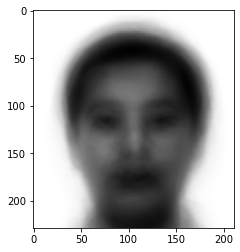

In [105]:
# Define the number of principal components to keep
p = 50

# Keep only the first p principal directions
V_p = V[:, :p]
S_p = S[:p, :p]

# Plot the mean face
plt.figure()
plt.imshow(train_faces.mean(axis = 0).reshape(faces_shape), cmap = "gray")
plt.show()

And now build a big image with the 6 first principal directions


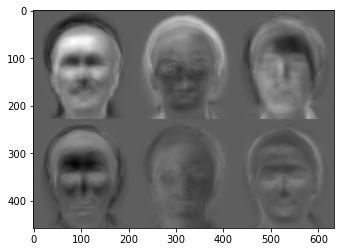

In [106]:
# Build up the images matrix
num_rows = 2
num_columns = 3
tmp = np.empty(shape = (faces_shape[0] * num_rows, faces_shape[1] * num_columns))
component_index = 0
for row in range(num_rows):
    for column in range(num_columns):
        tmp[faces_shape[0] * row: faces_shape[0] * (row + 1), faces_shape[1] * column: faces_shape[1] * (column + 1)] = (S_p[component_index, component_index] * V_p[:, component_index]).reshape(faces_shape)
        component_index += 1

# Plot the images
plt.figure()
plt.imshow(tmp, cmap = "gray")
plt.show()

**5) project a test face over principal directions**

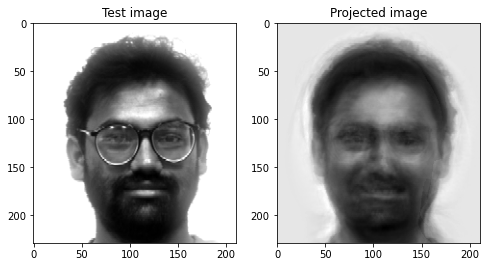

In [107]:
# Keep one of the test faces
x = test_faces[0, :]

# Build up the principal components
_, z = pca_prin_comp(x = x, eigen_vectors = V_p, mu = train_faces.mean(axis = 0)); 

# Reconstruct the face
x_proj = pca_reconstruct(z = z, eigen_vectors = V_p, mean = train_faces.mean(axis = 0))

# Show both faces
fig, (ax1, ax2) = plt.subplots(figsize=(8, 6), ncols=2)
ax1.imshow(x.reshape(faces_shape), cmap = "gray")
ax1.set_title("Test image")
ax2.imshow(x_proj.reshape(faces_shape), cmap = "gray")
ax2.set_title("Projected image")
plt.show()

<font color='green'>We have seen an application of PCA in faces: taking into account the first 50 principal components we are able to explain a big part of the model, which can be seen in the projected image: the porjection of the real image loses infromation, but we can still notice the similarities to the real face with less than half of the components</font>

**6) Recognize faces**

This a very simple face recognition algorithm: it is based on comparing the PCA coordinages of a query face with those of the training set.

Showing image 1 of 33


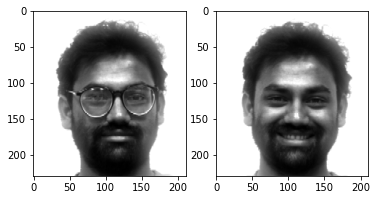

Showing image 2 of 33


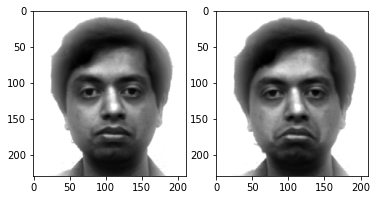

Showing image 3 of 33


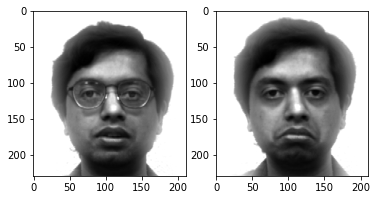

Showing image 4 of 33


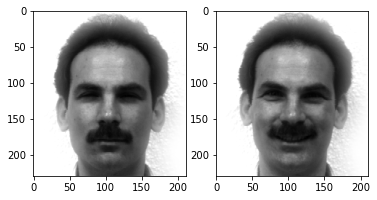

Showing image 5 of 33


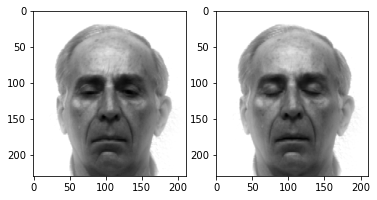

Showing image 6 of 33


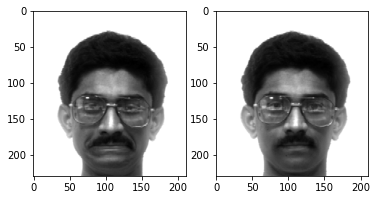

Showing image 7 of 33


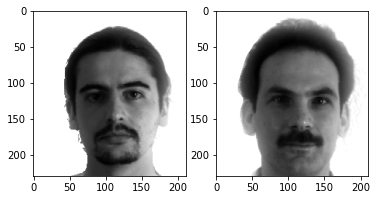

Showing image 8 of 33


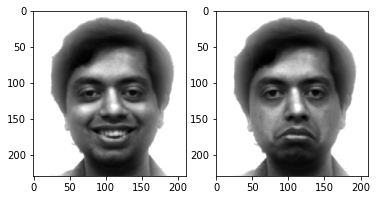

Showing image 9 of 33


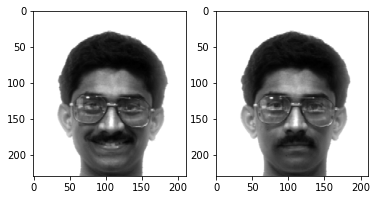

Showing image 10 of 33


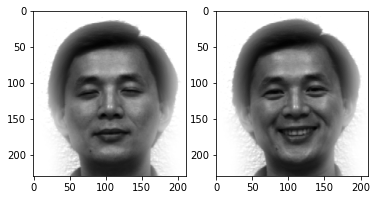

Showing image 11 of 33


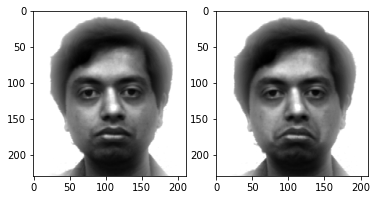

Showing image 12 of 33


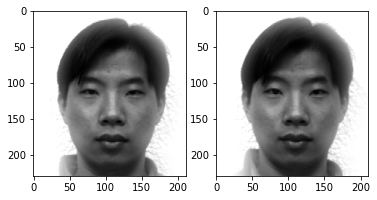

Showing image 13 of 33


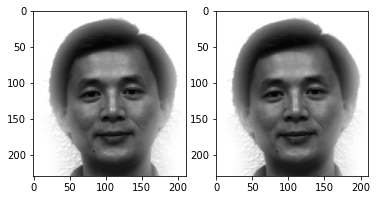

Showing image 14 of 33


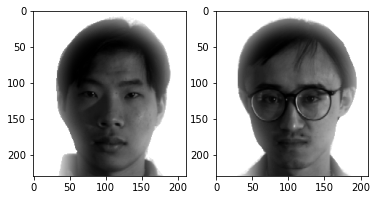

Showing image 15 of 33


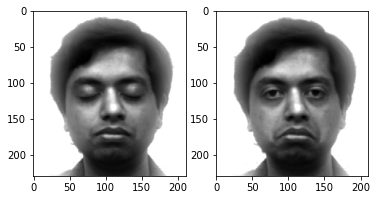

Showing image 16 of 33


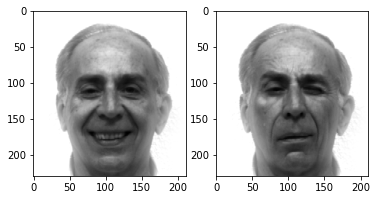

Showing image 17 of 33


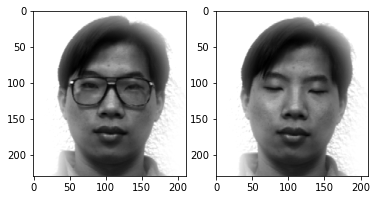

Showing image 18 of 33


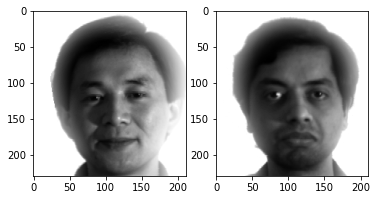

Showing image 19 of 33


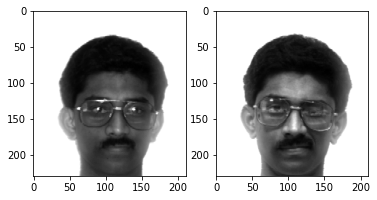

Showing image 20 of 33


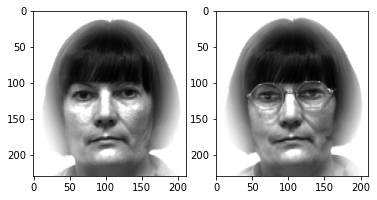

Showing image 21 of 33


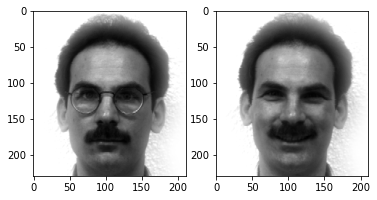

Showing image 22 of 33


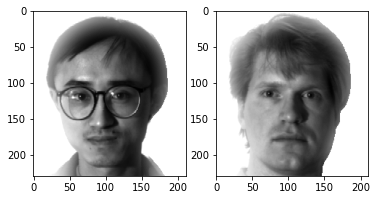

Showing image 23 of 33


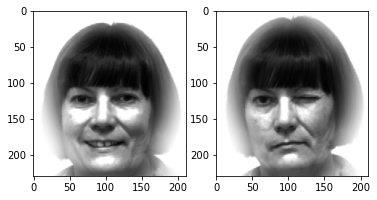

Showing image 24 of 33


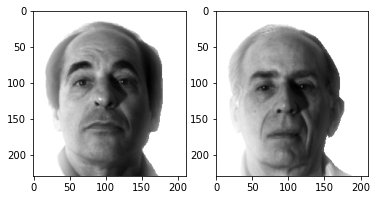

Showing image 25 of 33


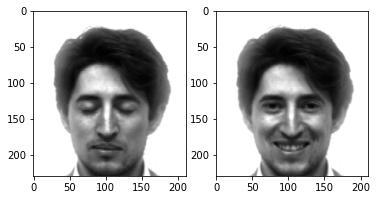

Showing image 26 of 33


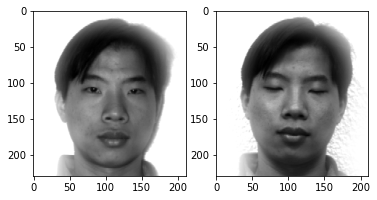

Showing image 27 of 33


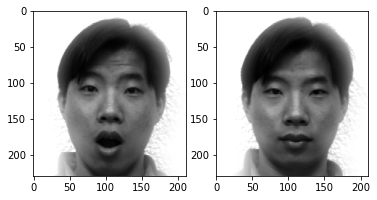

Showing image 28 of 33


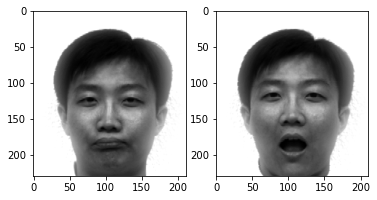

Showing image 29 of 33


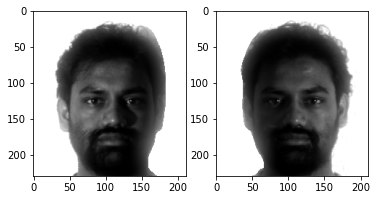

Showing image 30 of 33


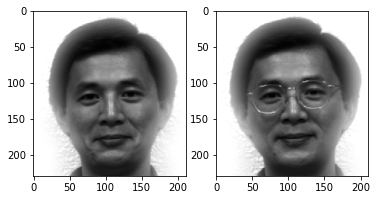

Showing image 31 of 33


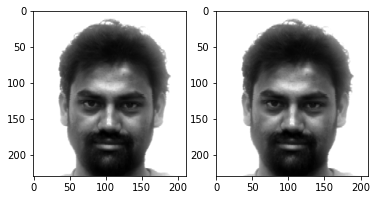

Showing image 32 of 33


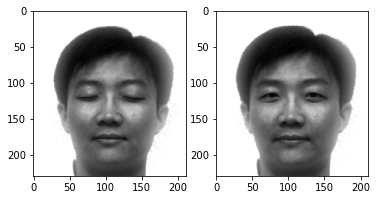

Showing image 33 of 33


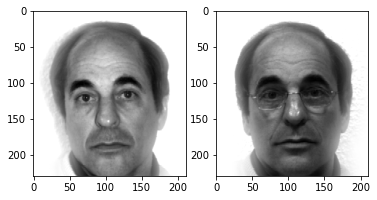

In [111]:
# Import a library to simulate time steps
import time
%matplotlib inline

# Define the number of principal components to keep
p = 50

# Keep only the first p principal directions
V_p = V[:, :p]
S_p = S[:p, :p]

# Compute principal components for training faces
_, train_z = pca_prin_comp(x = train_faces, eigen_vectors = V_p, mu = train_faces.mean(axis = 0))

# Compute principal components for test faces
_, test_z = pca_prin_comp(x = test_faces, eigen_vectors = V_p, mu = train_faces.mean(axis = 0))

# Classify
nn_idx = []
for i in range(len(test_faces)):
    d = np.linalg.norm(np.tile(test_z[[i], :], (train_z.shape[0], 1)).T - train_z.T, axis = 0).T
    nn_idx.append(int(d.argmin()))

# Visualize classification results
plt.figure()
plt.ion()
for i in range(len(test_faces)):
    print("Showing image {} of {}".format(i + 1, len(test_faces)))
    plt.subplot(1, 2, 1).imshow(test_faces[i, :].reshape(faces_shape), cmap = "gray")
    ax1.set_title("Test image")
    plt.subplot(1, 2, 2).imshow(train_faces[nn_idx[i], :].reshape(faces_shape), cmap = "gray")
    ax2.set_title("Training image")
    plt.show()
    plt.pause(1)

<font color='green'>When we use the PCA of training set to try to predict faces we can observe a very nice result: the model is able to recognize a face in the majority of the case. When we set p=1, it is very inneficient, and with p=131 we are using all the components, but with p=50, we can predict almost 90% of the faces much more quicker than using all the components and losing very little information</font>